# feature selection

## I plan to use the MNIST dataset to evaluate the capabilities of scikit-learn's feature selection algorithms(Filter methods).

In [1]:
from sklearn.datasets import fetch_openml

# import mnist dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

c:\Users\BLUENOTEBOOK\Desktop\media\ex\qenv\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X.shape

(70000, 784)

In [3]:
import matplotlib.pyplot as plt

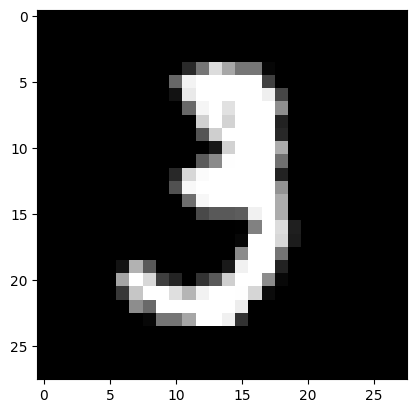

In [4]:
plt.imshow(X.iloc[10].values.reshape(28, 28), cmap='gray')

# Filter methods

## variance thresholde

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [6]:
#feature scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [7]:
# feature selection
selector = VarianceThreshold(threshold=0.01)
selected = selector.fit_transform(scaled)

In [8]:
print('number of features before selection:', X.shape[1])
print('number of feature after variance threshold method:', selected.shape[1])

number of features before selection: 784
number of feature after variance threshold method: 719


## unvariate analizes

###### use select k best and then chi_2 method to statistical exam

In [9]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [10]:
# fearture sclaing
scaler_ua = MinMaxScaler()
scaled_ua = scaler_ua.fit_transform(X)

In [11]:
# feature selection
selector_ua = SelectKBest(chi2, k=32)
selected_ua = selector_ua.fit_transform(scaled_ua, y)

In [12]:
print('number of features before selection:', X.shape[1])
print('number of feature after variance threshold method:', selected_ua.shape[1])

number of features before selection: 784
number of feature after variance threshold method: 32


## Feature Pairwise Correlation

##### if two or more features have strong correlation we can drop one of them. 

In [13]:
import numpy as np

# computing the absolute values of correlation
corr_matrix = X.corr().abs()

# keeping only upper part of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# finding the highly correlated features
THRESHOLD = 0.90
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > THRESHOLD)]
print('Feature(s) to drop:', ', '.join(to_drop))

# dropping the highly correlated features
selected = X.drop(to_drop, axis=1)

print('Number of features before selection:', X.shape[1])
print('Number of features after selection:', selected.shape[1])

Feature(s) to drop: pixel16, pixel87, pixel225, pixel281, pixel421, pixel617, pixel644, pixel646, pixel727
Number of features before selection: 784
Number of features after selection: 775
